In [24]:
# Step 0: Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import pickle
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [25]:
# Step 1: Data Generation

n = 6000  # More than 5000 as required

Injection_Temperature = np.random.uniform(180, 250, n)
Injection_Pressure = np.random.uniform(80, 150, n)
Cycle_Time = np.random.uniform(15, 45, n)
Cooling_Time = np.random.uniform(8, 20, n)
Material_Viscosity = np.random.uniform(100, 400, n)
Ambient_Temperature = np.random.uniform(18, 28, n)
Machine_Age = np.random.uniform(1, 15, n)
Operator_Experience = np.random.uniform(1, 120, n)
Maintenance_Hours = np.random.uniform(0, 200, n)

# Create realistic output formula
Parts_per_Hour = (
    400
    + 0.8 * Injection_Temperature
    + 1.5 * Injection_Pressure
    - 5 * Cycle_Time
    - 2 * Cooling_Time
    - 0.1 * Material_Viscosity
    - 3 * Machine_Age
    + 0.5 * Operator_Experience
    - 0.2 * Maintenance_Hours
    + np.random.normal(0, 20, n)  # Noise
)

df = pd.DataFrame({
    "Injection_Temperature": Injection_Temperature,
    "Injection_Pressure": Injection_Pressure,
    "Cycle_Time": Cycle_Time,
    "Cooling_Time": Cooling_Time,
    "Material_Viscosity": Material_Viscosity,
    "Ambient_Temperature": Ambient_Temperature,
    "Machine_Age": Machine_Age,
    "Operator_Experience": Operator_Experience,
    "Maintenance_Hours": Maintenance_Hours,
    "Parts_per_Hour": Parts_per_Hour
})

df.to_csv("manufacturing_data.csv", index=False)

df.head()

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Parts_per_Hour
0,206.217808,125.377987,34.629190,15.748288,305.658405,24.381446,13.832293,113.657131,137.341219,500.882311
1,246.550001,92.067045,17.400977,12.829022,240.271289,22.592925,14.302991,107.673175,82.512811,606.780486
2,231.239576,141.067619,22.269894,13.662909,116.712069,27.644985,1.061742,29.024177,56.068368,666.434747
3,221.906094,122.918137,38.210380,16.600697,375.553045,20.189785,5.439050,32.268414,123.171435,445.657893
4,190.921305,91.004272,30.860576,18.515672,394.098740,23.878564,12.723292,117.791131,148.053822,430.533020


Step 2.3
Understand the business meaning of each variable

| **Column**                       | **Business Meaning**                                                                                                                |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| **Timestamp**                    | The exact date and time when the manufacturing cycle data was recorded. Useful for time-series analysis and shift-based trends.     |
| **Injection\_Temperature**       | The temperature (°C) at which material is injected into the mold. Affects product quality, cycle time, and energy consumption.      |
| **Injection\_Pressure**          | The pressure (bar) used to inject material into the mold. Influences product density, surface finish, and defect rates.             |
| **Cycle\_Time**                  | The time (seconds) taken for one complete production cycle, excluding cooling. Directly impacts throughput.                         |
| **Cooling\_Time**                | The cooling duration (seconds) within the cycle. Balances product quality (avoiding warping) and speed.                             |
| **Material\_Viscosity**          | A measure of how easily the raw material flows. Affects mold filling and product consistency.                                       |
| **Ambient\_Temperature**         | The surrounding environmental temperature (°C) in the production area, which can influence material cooling and machine efficiency. |
| **Machine\_Age**                 | Age of the machine (years). Older machines may have higher maintenance needs and lower efficiency.                                  |
| **Operator\_Experience**         | Number of months the operator has worked on the process. Experienced operators usually reduce defects and downtime.                 |
| **Maintenance\_Hours**           | Hours spent on maintenance for the machine during the observed period. High values may indicate machine reliability issues.         |
| **Shift**                        | The production shift (Day, Evening, Night). Important for analyzing performance differences between shifts.                         |
| **Machine\_Type**                | Category/type of machine (e.g., Type\_A, Type\_B, Type\_C). Different machines may have varying capabilities and efficiencies.      |
| **Material\_Grade**              | Quality grade of raw material used (Economy, Standard, Premium). Impacts product quality, durability, and cost.                     |
| **Day\_of\_Week**                | The day when production took place. Helps spot weekday vs. weekend performance differences.                                         |
| **Temperature\_Pressure\_Ratio** | Ratio of injection temperature to pressure. A process control metric that can signal efficiency or risk of defects.                 |
| **Total\_Cycle\_Time**           | Complete time (seconds) for one production cycle, including cooling. Key factor for production planning.                            |
| **Efficiency\_Score**            | A performance indicator (0–1 scale) combining factors like speed, quality, and uptime. Higher is better.                            |
| **Machine\_Utilization**         | Percentage of time the machine is actively producing (0–1 scale). Low utilization may mean downtime or inefficiencies.              |
| **Parts\_Per\_Hour**             | Average number of parts produced per hour. Direct measure of productivity.                                                          |


Data Exploration

In [26]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Shape: (6000, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Injection_Temperature  6000 non-null   float64
 1   Injection_Pressure     6000 non-null   float64
 2   Cycle_Time             6000 non-null   float64
 3   Cooling_Time           6000 non-null   float64
 4   Material_Viscosity     6000 non-null   float64
 5   Ambient_Temperature    6000 non-null   float64
 6   Machine_Age            6000 non-null   float64
 7   Operator_Experience    6000 non-null   float64
 8   Maintenance_Hours      6000 non-null   float64
 9   Parts_per_Hour         6000 non-null   float64
dtypes: float64(10)
memory usage: 468.9 KB
None

Summary Statistics:
       Injection_Temperature  Injection_Pressure   Cycle_Time  Cooling_Time  \
count            6000.000000         6000.000000  6000.000000   6000.000000   
mean             

EDA

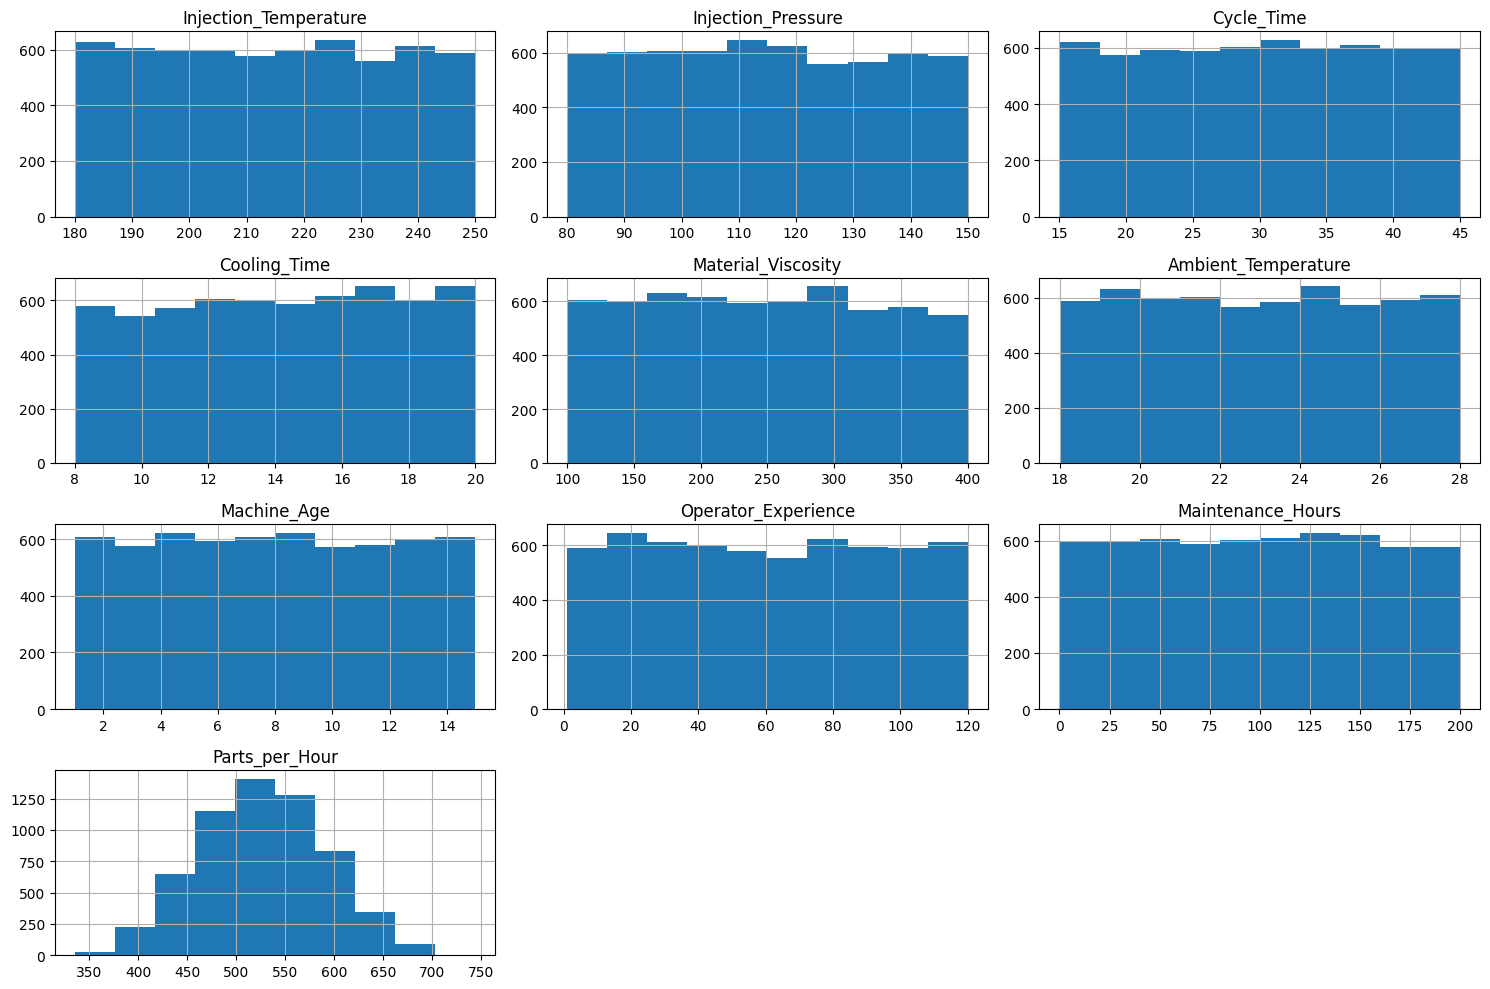

In [27]:
#Histograms
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

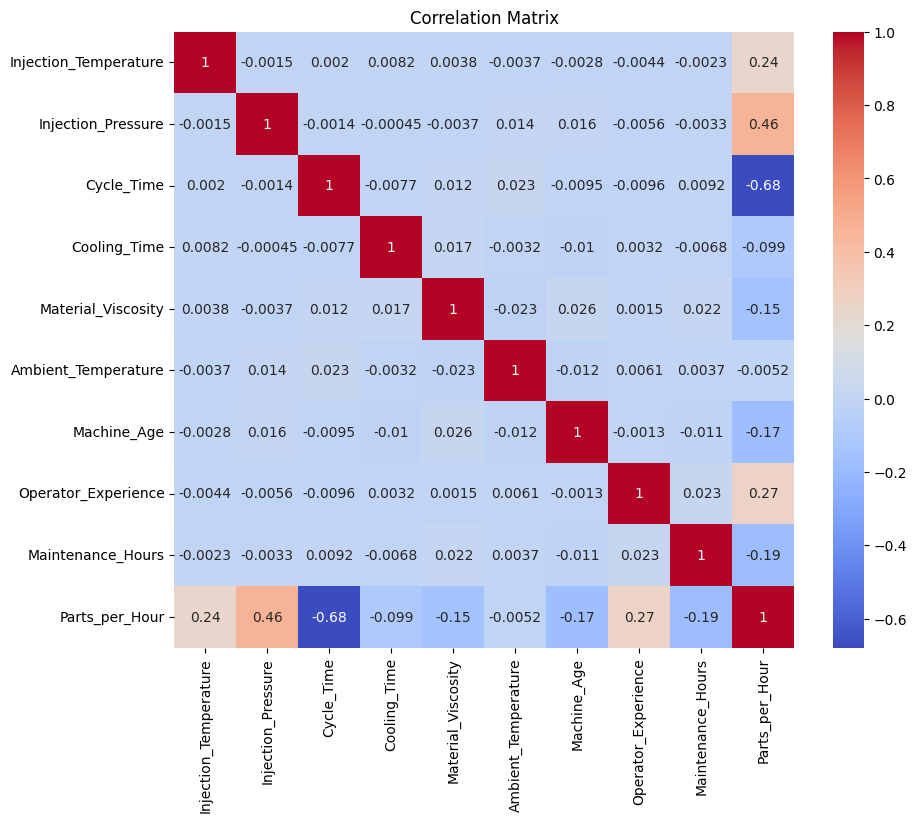

In [29]:
#Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()#

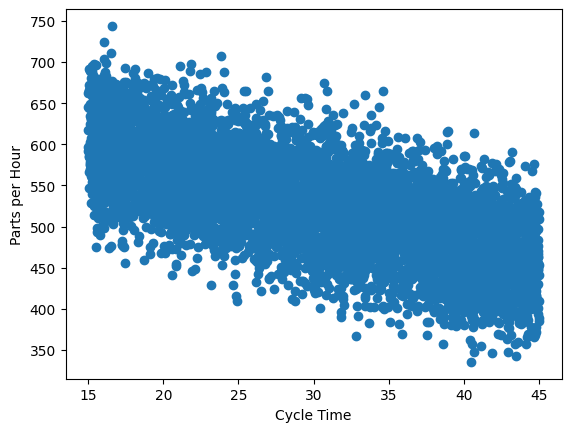

In [30]:
#Scatter Plot Example
plt.scatter(df["Cycle_Time"], df["Parts_per_Hour"])
plt.xlabel("Cycle Time")
plt.ylabel("Parts per Hour")
plt.show()

Outlier Handling (IQR Method)

In [31]:
# Remove outliers using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (5997, 10)


Feature Engineering

In [32]:
# Efficiency ratio
df["Pressure_Cycle_Ratio"] = df["Injection_Pressure"] / df["Cycle_Time"]
df.head()

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Parts_per_Hour,Pressure_Cycle_Ratio
0,206.217808,125.377987,34.629190,15.748288,305.658405,24.381446,13.832293,113.657131,137.341219,500.882311,3.620587
1,246.550001,92.067045,17.400977,12.829022,240.271289,22.592925,14.302991,107.673175,82.512811,606.780486,5.290912
2,231.239576,141.067619,22.269894,13.662909,116.712069,27.644985,1.061742,29.024177,56.068368,666.434747,6.334454
3,221.906094,122.918137,38.210380,16.600697,375.553045,20.189785,5.439050,32.268414,123.171435,445.657893,3.216878
4,190.921305,91.004272,30.860576,18.515672,394.098740,23.878564,12.723292,117.791131,148.053822,430.533020,2.948884


Train-Test Split & Scaling

In [33]:
X = df.drop("Parts_per_Hour", axis=1)
y = df["Parts_per_Hour"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [34]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

Model Evaluation

In [35]:
print("TRAINING PERFORMANCE")
print("R2:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE:", mean_absolute_error(y_train, y_train_pred))

print("\nTEST PERFORMANCE")
print("R2:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

TRAINING PERFORMANCE
R2: 0.9034901914355098
MSE: 394.1658482016366
RMSE: 19.853610457587724
MAE: 15.775470078592559

TEST PERFORMANCE
R2: 0.9014017844607864
MSE: 404.2878681999169
RMSE: 20.106910956184116
MAE: 16.247965645086747


Residual Plot

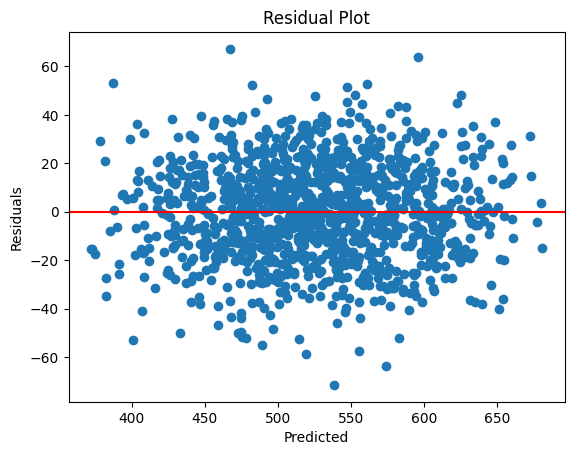

In [36]:
residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Predicted vs Actual

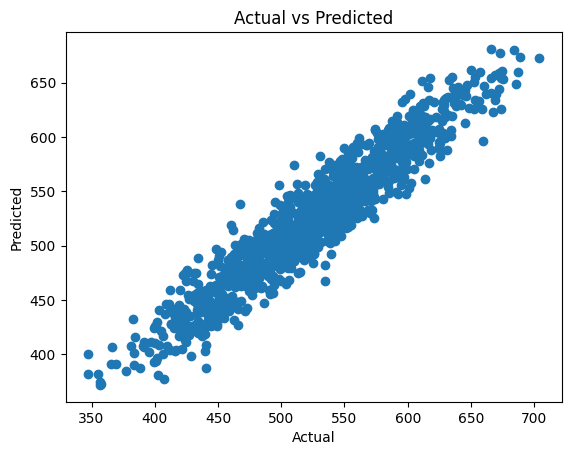

In [37]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Coefficient Interpretation

In [38]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,Injection_Pressure,29.401874
7,Operator_Experience,17.336950
0,Injection_Temperature,15.795033
9,Pressure_Cycle_Ratio,0.677369
5,Ambient_Temperature,-0.146177
3,Cooling_Time,-7.154494
4,Material_Viscosity,-8.470531
8,Maintenance_Hours,-11.606735
6,Machine_Age,-11.859123
2,Cycle_Time,-42.555976


Save Model (Serialization)

In [39]:
with open("manufacturing_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model saved successfully!")

Model saved successfully!


**Business Recommendations**

*   Manufacturing Insights

1.   Reduce Cycle Time to increase hourly output
2.  Maintain optimal Injection Pressure (100–130 bar range)
3. Perform maintenance every 100 hours
4. Train operators to improve efficiency
5. Replace machines older than 10 years





